## Where Do People Drink The Most Beer, Wine And Spirits?

<img src="https://s1.qwant.com/thumbr/0x0/3/f/a2d61eb9aa851a55e62456389bde7986e358da62a08b5c5ac98aaa851447dc/alcoholconsumption.gif?u=http%3A%2F%2F4.bp.blogspot.com%2F-0u5Sk_omAEE%2FTV3XZtyPQ1I%2FAAAAAAAAArc%2FyVlSiUp6aTU%2Fs1600%2Falcoholconsumption.gif&q=0&b=1&p=0&a=1">

The dataset for this analysis is from this post in [FiveThirtyEight](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)

Data: https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Problem 1
Convert the following data into tidy format with the headers `country`, `drink` and `servings`. Drop the column `total_litres_of_pure_alcohol`

In [4]:
alcohol= pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
alcohol.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [5]:
tidy_alcohol = alcohol.drop(columns=['total_litres_of_pure_alcohol']).melt(
    id_vars = ['country'],
    var_name="Alcohol_Type",
    value_name = "Servings"
)
tidy_alcohol


,country,Alcohol_Type,Servings
0,Afghanistan,beer_servings,0
1,Albania,beer_servings,89
2,Algeria,beer_servings,25
3,Andorra,beer_servings,245
4,Angola,beer_servings,217
...,...,...,...
574,Venezuela,wine_servings,3
575,Vietnam,wine_servings,1
576,Yemen,wine_servings,0
577,Zambia,wine_servings,4


## Problem 2
Remove `"_servings"` from the data in the tidy dataframe in Problem 1. Who drinks the most beer, wine and spirits? Create three categorical plots of your choice to illustrate the top 10 countries that drink the most wine, beer or spirits.

In [6]:
tidy_alcohol['Alcohol_Type'] = tidy_alcohol['Alcohol_Type'].str[:-9]
tidy_alcohol

,country,Alcohol_Type,Servings
0,Afghanistan,beer,0
1,Albania,beer,89
2,Algeria,beer,25
3,Andorra,beer,245
4,Angola,beer,217
...,...,...,...
574,Venezuela,wine,3
575,Vietnam,wine,1
576,Yemen,wine,0
577,Zambia,wine,4


In [12]:
import numpy as np
np.sort(tidy_alcohol["Alcohol_Type"].unique())
top_10 = tidy_alcohol.groupby('country').Servings.mean().nlargest(10).reset_index()
top_10

,country,Servings
0,Andorra,231.666667
1,Czech Republic,221.666667
2,Grenada,221.666667
3,France,216.000000
4,Russian Federation,215.333333
5,Lithuania,214.333333
6,Luxembourg,213.333333
7,Germany,212.666667
8,Hungary,211.333333
9,Poland,204.666667


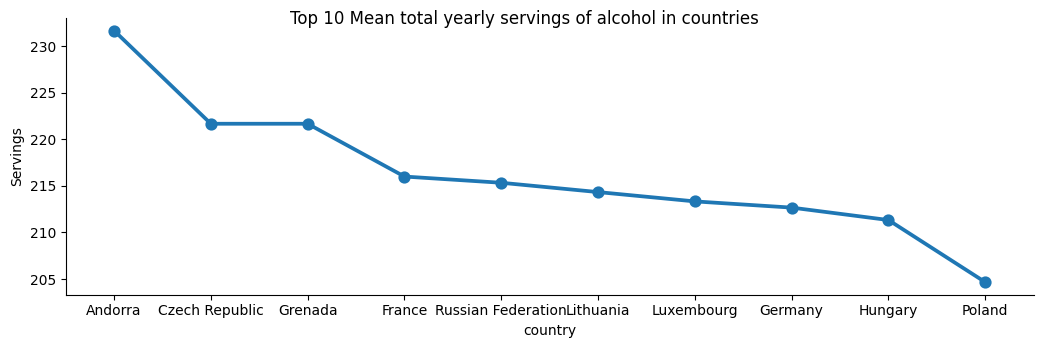

In [16]:
g = sns.catplot(
    data = top_10,
    x="country",
    y="Servings",
    kind="point",
    aspect=3,
    height=3.5
)

g.fig.suptitle('''Top 10 Mean total yearly servings of alcohol by countries''');

In [36]:
top_10_raw = tidy_alcohol[tidy_alcohol["country"].isin(top_10["country"])]
top_10_total_parts = top_10_raw.groupby(["country","Alcohol_Type"])["Servings"].mean().reset_index()
top_10_total_parts

,country,Alcohol_Type,Servings
0,Andorra,beer,245.0
1,Andorra,spirit,138.0
2,Andorra,wine,312.0
3,Czech Republic,beer,361.0
4,Czech Republic,spirit,170.0
5,Czech Republic,wine,134.0
6,France,beer,127.0
7,France,spirit,151.0
8,France,wine,370.0
9,Germany,beer,346.0


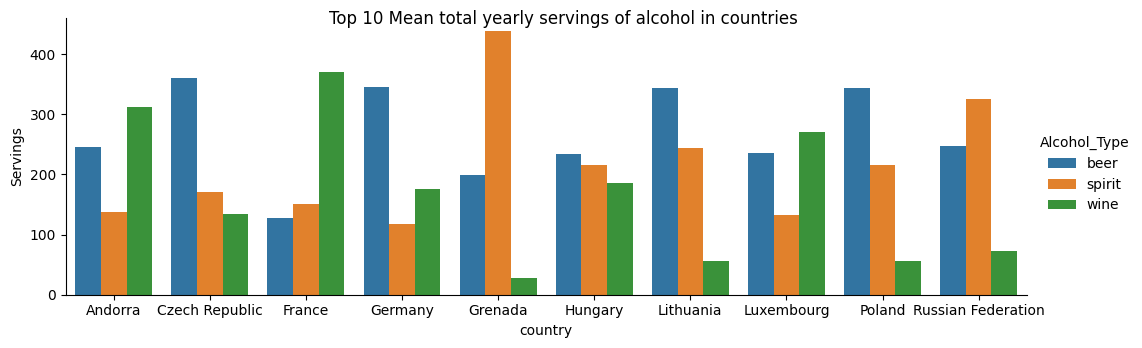

In [31]:

g = sns.catplot(
    data = top_10_total_parts,
    x="country",
    y="Servings",
    hue="Alcohol_Type",
    kind="bar",
    aspect=3,
    height=3.5
)

g.fig.suptitle('''Top 10 yearly servings of each alcohol type by countries''');

In [29]:
mean_by_type = tidy_alcohol.groupby(["country","Alcohol_Type"])["Servings"].mean().nlargest(10).reset_index()
mean_by_type

,country,Alcohol_Type,Servings
0,Grenada,spirit,438.0
1,Namibia,beer,376.0
2,Belarus,spirit,373.0
3,France,wine,370.0
4,Czech Republic,beer,361.0
5,Gabon,beer,347.0
6,Germany,beer,346.0
7,Lithuania,beer,343.0
8,Poland,beer,343.0
9,Portugal,wine,339.0


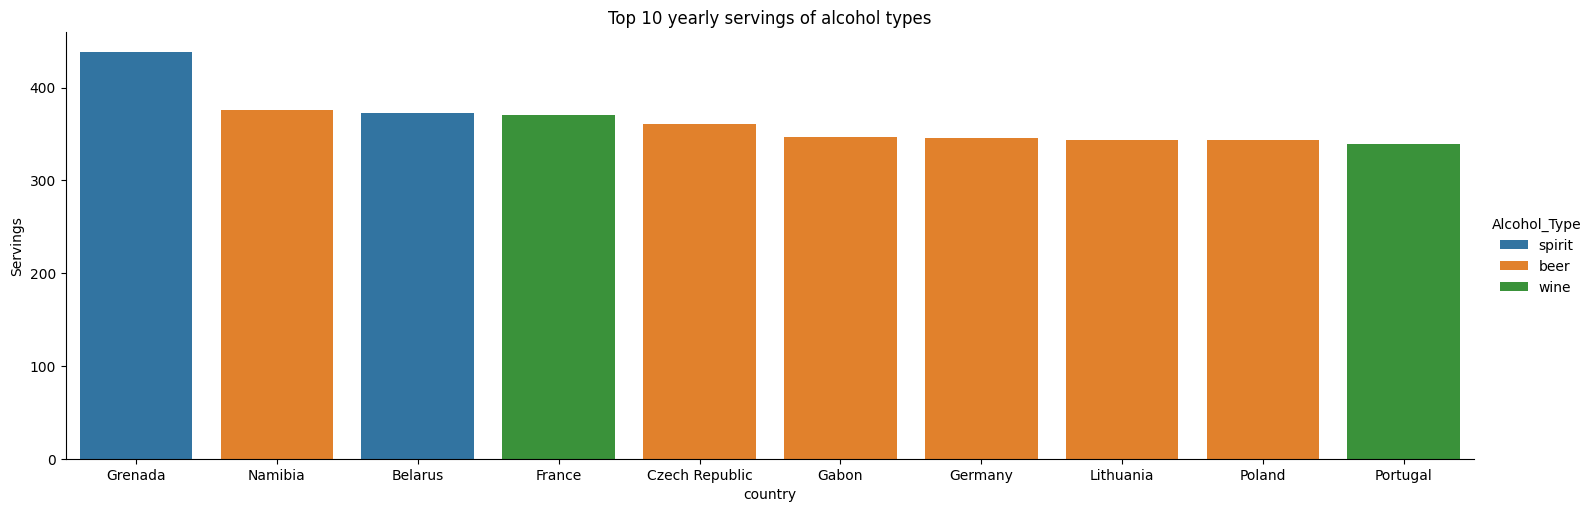

In [35]:
sns.catplot(
    data=mean_by_type,
    y="Servings",
    x="country",
    kind="bar",
    hue="Alcohol_Type",
    aspect=3
)
plt.title("Top 10 yearly servings of alcohol types");

## Problem 3
Create a wide dataframe using `pivot_table` with the tidy dataframe from Problem 2

In [38]:
pd.pivot_table(tidy_alcohol, values='Servings', index=['country'], columns='Alcohol_Type',aggfunc='mean')

Alcohol_Type,beer,spirit,wine
country,,,
Afghanistan,0.0,0.0,0.0
Albania,89.0,132.0,54.0
Algeria,25.0,0.0,14.0
Andorra,245.0,138.0,312.0
Angola,217.0,57.0,45.0
...,...,...,...
Venezuela,333.0,100.0,3.0
Vietnam,111.0,2.0,1.0
Yemen,6.0,0.0,0.0
